In [1]:
#!pip install requests beautifulsoup4 pillow
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import time

# Web Scraping a Wikipedia Page

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1BBM_66IJHjdCPOkk-ocrYNu87vnAawJK?usp=sharing)

## Scraping Headers and Links

In [2]:
# Specify a user agent to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Replace this URL with your Wikipedia link
url = 'https://en.wikipedia.org/wiki/Python_(programming_language)'

'''
!!! Be mindful of running any cell with the "get" function too many times in a short period of time.
'''
# Fetch the webpage with user agent
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

In [3]:
response

<Response [200]>

In [4]:
# Find all headers
headers = soup.find_all(['h1', 'h2', 'h3', 'h4', 'h5', 'h6'])
print("\nHeaders found on the page:")
for header in headers:
    print(header.text)


Headers found on the page:
Contents
Python (programming language)
History
Design philosophy and features
Syntax and semantics
Indentation
Statements and control flow
Expressions
Methods
Typing
Arithmetic operations
Function syntax
Code examples
Libraries
Development environments
Implementations
Reference implementation
Other implementations
Unsupported implementations
Cross-compilers to other languages
Performance
Language Development
API documentation generators
Naming
Popularity
Types of use
Limitations
Languages influenced by Python
See also
Notes
References
Sources
Further reading
External links


In [5]:
# Find all links
links = [a['href'] for a in soup.find_all('a', href=True) if a['href'].startswith('http')]
print("Links found on the page:")
print(links[:5])  # Display only the first 5 for brevity

Links found on the page:
['https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en', 'https://donate.wikimedia.org/?wmf_source=donate&wmf_medium=sidebar&wmf_campaign=en.wikipedia.org&uselang=en', 'https://af.wikipedia.org/wiki/Python_(programmeertaal)', 'https://als.wikipedia.org/wiki/Python_(Programmiersprache)', 'https://ar.wikipedia.org/wiki/%D8%A8%D8%A7%D9%8A%D8%AB%D9%88%D9%86_(%D9%84%D8%BA%D8%A9_%D8%A8%D8%B1%D9%85%D8%AC%D8%A9)']


## Scraping Images

In [6]:
# Specify a user agent to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Replace this URL with your Wikipedia link
url = 'https://en.wikipedia.org/wiki/Los_Angeles_Dodgers'

'''
!!! Be mindful of running any cell with the "get" function too many times in a short period of time.
'''
# Fetch the webpage with user agent
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

In [7]:
response

<Response [200]>

In [8]:
# Find all images
images = soup.find_all('img')
images[0]

<img alt="" aria-hidden="true" class="mw-logo-icon" height="50" src="/static/images/icons/wikipedia.png" width="50"/>

**Our image link is nested! We need to do access the link using the "src" property.**

In [9]:
# Get image paths from src
img_links = []
for img in images:
    img_src = img['src']
    img_links.append(img_src)
img_links[0:5]

['/static/images/icons/wikipedia.png',
 '/static/images/mobile/copyright/wikipedia-wordmark-en.svg',
 '/static/images/mobile/copyright/wikipedia-tagline-en.svg',
 '//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Baseball_current_event.svg/40px-Baseball_current_event.svg.png']

**Let's only keep PNGs since they are easy to plot.**

In [10]:
img_links = [link for link in img_links if link[-4:] == ".png"]
img_links[0:5]

['/static/images/icons/wikipedia.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Baseball_current_event.svg/40px-Baseball_current_event.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Los_Angeles_Dodgers_Logo.svg/120px-Los_Angeles_Dodgers_Logo.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/f/f6/LA_Dodgers.svg/120px-LA_Dodgers.svg.png']

**Let's remove anything with the word "static" in the path. These are images that are reused all over the website.**

In [11]:
img_links = [link for link in img_links if "/static/" not in link]
img_links[0:5]

['//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Baseball_current_event.svg/40px-Baseball_current_event.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Los_Angeles_Dodgers_Logo.svg/120px-Los_Angeles_Dodgers_Logo.svg.png',
 '//upload.wikimedia.org/wikipedia/commons/thumb/f/f6/LA_Dodgers.svg/120px-LA_Dodgers.svg.png',
 '//upload.wikimedia.org/wikipedia/en/thumb/e/e5/MLB-NLW-LAD-Uniforms.png/330px-MLB-NLW-LAD-Uniforms.png']

**Good! Our URLs are local paths. They are incomplete. This is a very common problem in webscraping.**

**We need to add the base URL back into the path.**

In [12]:
img_links_clean = []
for link in img_links:
    full_link = "https:"+link
    img_links_clean.append(full_link)
img_links_clean

['https://upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/a/a6/Baseball_current_event.svg/40px-Baseball_current_event.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/0/0e/Los_Angeles_Dodgers_Logo.svg/120px-Los_Angeles_Dodgers_Logo.svg.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/f6/LA_Dodgers.svg/120px-LA_Dodgers.svg.png',
 'https://upload.wikimedia.org/wikipedia/en/thumb/e/e5/MLB-NLW-LAD-Uniforms.png/330px-MLB-NLW-LAD-Uniforms.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/5/5b/HollywoodStarsCap.png/250px-HollywoodStarsCap.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Dodgersuni.png/250px-Dodgersuni.png',
 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Los_Angeles_Dodgers_Script_Logo.svg/250px-Los_Angeles_Dodgers_Script_Logo.svg.png',
 'https://upload.wikimedia.org/wikipedia/en/thumb/1/10

**Let's plot some images!!!**

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as img

In [14]:
img_links_clean[0]

'https://upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png'

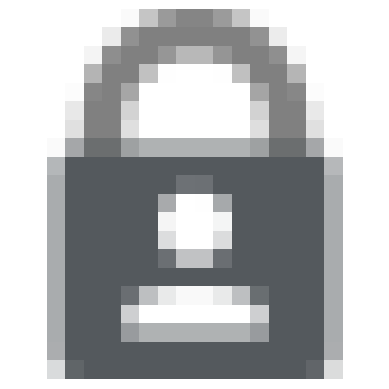

In [17]:
image_url = img_links_clean[0]

r = requests.get(image_url, headers={"User-Agent":"Mozilla/5.0 (DS-3001)"}, timeout=20)
r.raise_for_status()

ct = r.headers.get("Content-Type","")
if "image/svg+xml" in ct or image_url.lower().endswith(".svg"):
    raise ValueError("This URL is an SVG; PIL can't open it directly.")

if "image" not in ct:
    raise ValueError(f"Not an image. Content-Type={ct}")

im = Image.open(BytesIO(r.content)).convert("RGBA")  # use content, not raw
plt.imshow(im); plt.axis("off"); plt.show()


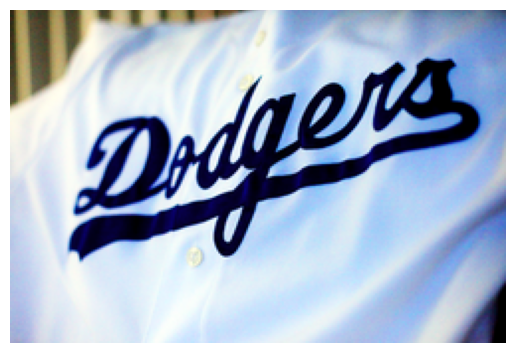

In [18]:
image_url = img_links_clean[6]

r = requests.get(image_url, headers={"User-Agent":"Mozilla/5.0 (DS-3001)"}, timeout=20)
r.raise_for_status()

ct = r.headers.get("Content-Type","")
if "image/svg+xml" in ct or image_url.lower().endswith(".svg"):
    raise ValueError("This URL is an SVG; PIL can't open it directly.")

if "image" not in ct:
    raise ValueError(f"Not an image. Content-Type={ct}")

im = Image.open(BytesIO(r.content)).convert("RGBA")  # use content, not raw
plt.imshow(im); plt.axis("off"); plt.show()


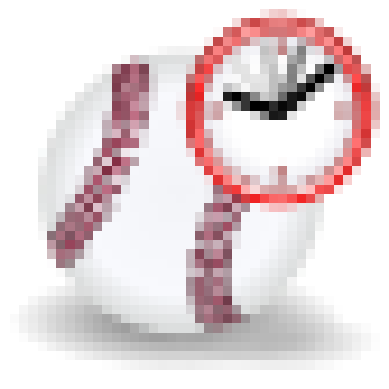

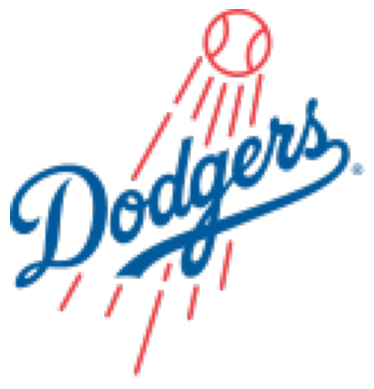

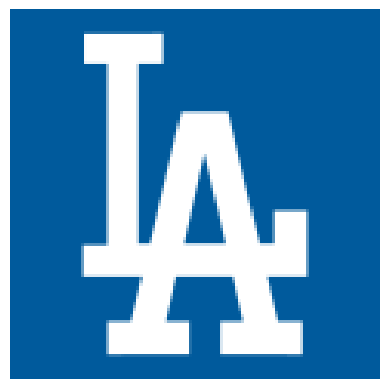

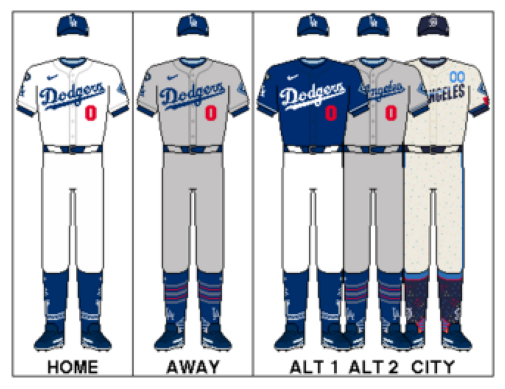

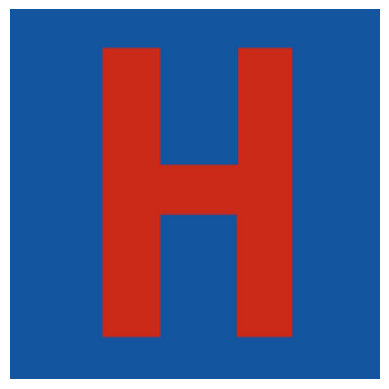

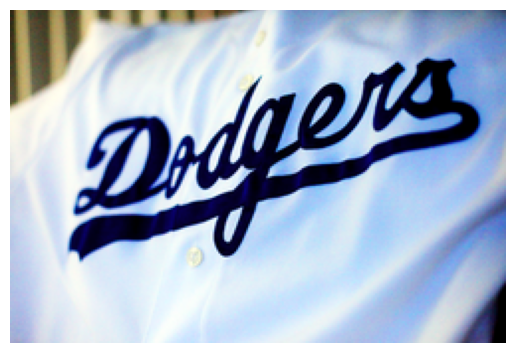

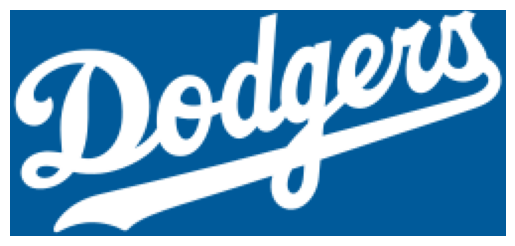

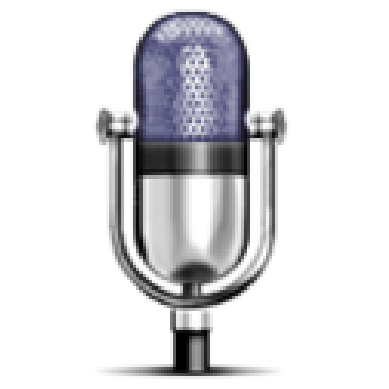

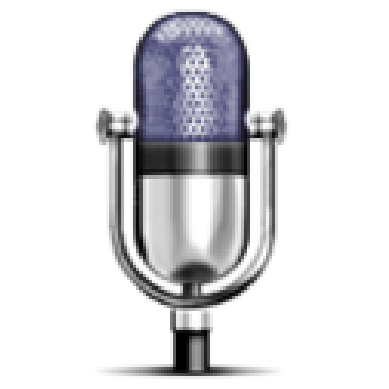

In [19]:
for link in img_links_clean[1:10]:
    image_url = link

    r = requests.get(image_url, headers={"User-Agent":"Mozilla/5.0 (DS-3001)"}, timeout=20)
    r.raise_for_status()

    ct = r.headers.get("Content-Type","")
    if "image/svg+xml" in ct or image_url.lower().endswith(".svg"):
        raise ValueError("This URL is an SVG; PIL can't open it directly.")

    if "image" not in ct:
        raise ValueError(f"Not an image. Content-Type={ct}")

    im = Image.open(BytesIO(r.content)).convert("RGBA")  # use content, not raw
    plt.imshow(im); plt.axis("off"); plt.show()

## All together

In [20]:
# Specify a user agent to mimic a browser request
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
}

# Replace this URL with your Wikipedia link
url = 'https://en.wikipedia.org/wiki/Giant_panda'

'''
!!! Be mindful of running any cell with the "get" function too many times in a short period of time.
'''
# Fetch the webpage with user agent
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')
response

<Response [200]>

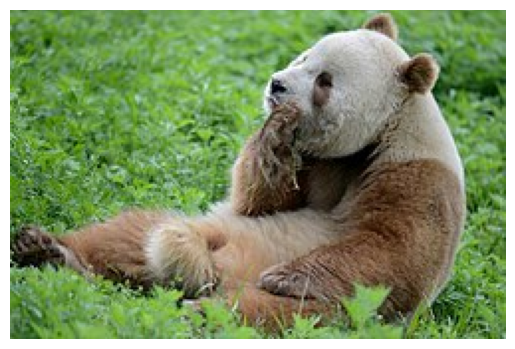

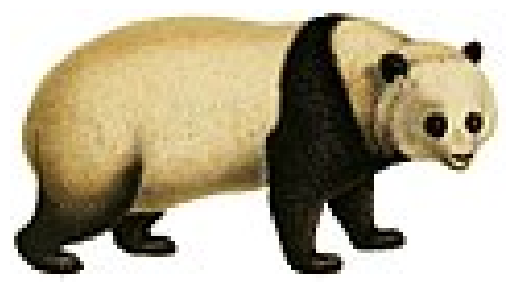

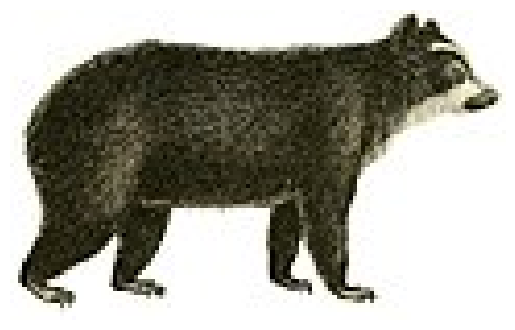

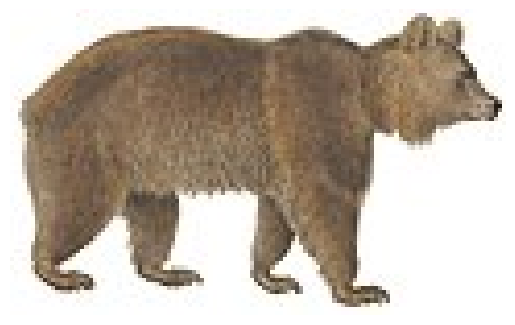

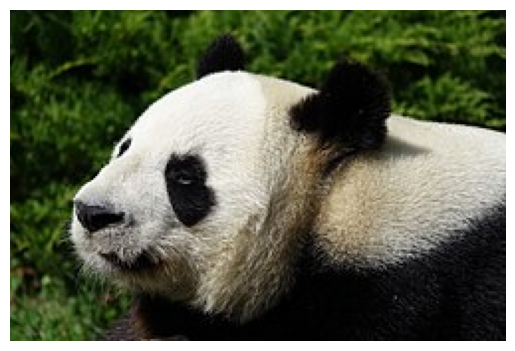

In [21]:
# Find all images
images = soup.find_all('img')

# Get image paths from src
img_links = []
for img in images:
    img_src = img['src']
    img_links.append(img_src)

# Filter only file types you want
img_links = [link for link in img_links if link[-4:] in [".jpg"]]
img_links = [link for link in img_links if "/static/" not in link]

# Clean and correct links
img_links_clean = []
for link in img_links[0:5]:
    full_link = "https:"+link
    img_links_clean.append(full_link)

    '''!!! Very important to add wait times if using requests in a loop.'''
    time.sleep(2)
    image_url = full_link

    r = requests.get(image_url, headers={"User-Agent":"Mozilla/5.0 (DS-3001)"}, timeout=20)
    r.raise_for_status()

    ct = r.headers.get("Content-Type","")
    if "image/svg+xml" in ct or image_url.lower().endswith(".svg"):
        raise ValueError("This URL is an SVG; PIL can't open it directly.")

    if "image" not in ct:
        raise ValueError(f"Not an image. Content-Type={ct}")

    im = Image.open(BytesIO(r.content)).convert("RGBA")  # use content, not raw
    plt.imshow(im); plt.axis("off"); plt.show()